# Stage3

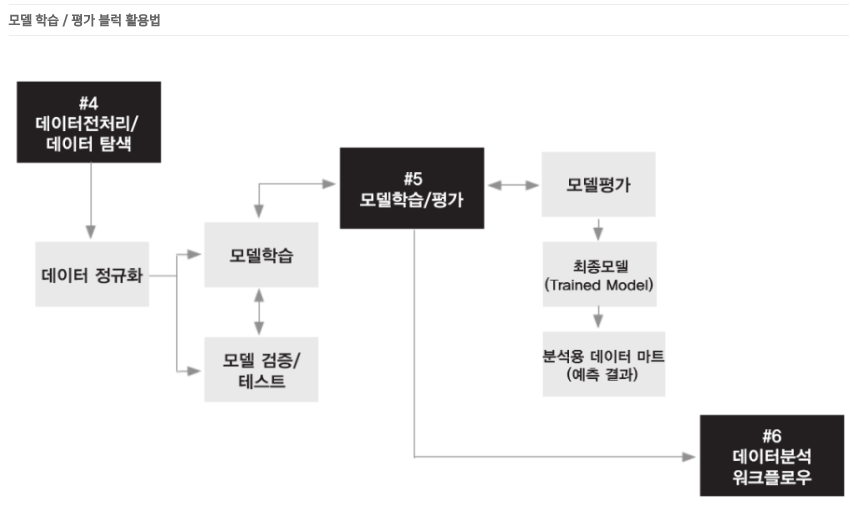

한국데이터산업진흥원 자료에 의하면 모델링이란 분석용 데이터를 이용한 가설 설정을 통하여 통계모형을 만들거나 기계학습(Machine Learning)을 이용한 데이터의 분류, 예측, 군집 등의 기능을 수행하는 모형을 만드는 과정입니다. 

기계학습은 지도학습(Supervised Learning)과 비지도학습(Un-supervised Learning) 등으로 나뉘어 다양한 알고리즘을 적용할 수 있습니다. 

모델링을 효과적으로 진행하기 위해서는 모델링 전에 데이터셋을 Training과 Testing으로 분할함으로써 모형의 과적합(Overfitting)을 방지하거나 모형의 일반화(Generalization)에 이용됩니다.

기계학습 등을 이용한 데이터 모델링은 Training 데이터를 활용하여 분류, 예측, 군집 등의 모형을 만들어 가동중인 운영 시스템에 적용합니다. 또한 필요시 비정형 데이터 분석결과를 통합적으로 활용하여 프로젝트 목적에 맞는 통합 모델링을 수행합니다.

**<블록 체크리스트>**
*   데이터 셋 분할 방법 선택
*   분석 주제에 맞는 분석 모델 방법론과 알고리즘을 검토
*   해당 모델 학습을 위한 변수 변환 방법론을 검토



`data set 분할`

Train dataset에 종속변수 Class 변수가 없으므로 Train dataset도 Validation dataset과 동일한 비율로 사기거래를 예측을 합니다.

val_df['Class']에 정상거래와 사기거래의 횟수 확인하기 위해 value_counts()를 활용합니다.
- 0 : 정상거래
- 1 : 사기거래

In [ ]:
val_df['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

### Q. 사기거래의 발생 비율(val_contamination)을 구해보자!

### Hint.
 사기거래 발생 비율은 사기거래 발생 횟수 / 정상거래 발생 횟수

### Solution

In [ ]:
val_normal, val_fraud=val_df['Class'].value_counts()
val_contamination=val_fraud / val_normal 

print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


### 이상 탐지 모델 생성
이번에 사용할 이상 탐지 모델은 IsolationForest로 밀도기반으로 이상 탐지하는 알고리즘입니다.</br>

IsolationForest는 데이터의 이상치(Outlier)를 탐지하기 위한 알고리즘 중 하나로, Breiman과 Cutler가 2001년에 개발한 Random Forest의 변형 알고리즘입니다.

Isolation Forest는 데이터의 이상치가 속한 구역을 찾아내기 위해 무작위로 분할을 수행하는 결정트리를 이용합니다. 이 때, 일반적인 결정트리와는 달리, Isolation Forest는 균등하게 분할되지 않는 것이 특징입니다. 무작위 분할을 통해 각 분할 구간의 경계선을 찾아내며, 이를 이용하여 이상치를 구별합니다. 각 결정트리에서 이상치로 판단되는 데이터는 더 적은 분할 횟수를 거칩니다. 이러한 방식으로 이상치를 탐지하게 됩니다.

Isolation Forest의 장점으로는 이상치 탐지에 있어서 성능이 높다는 점이 있습니다. 또한, 학습 데이터의 크기에 비해 빠른 속도로 이상치를 탐지할 수 있으며, 다른 알고리즘보다 상대적으로 적은 메모리를 필요로 합니다. 단점으로는 특정 데이터에 대해서는 이상치를 정확하게 판단하지 못하는 경우가 있을 수 있다는 점입니다.

In [ ]:
## Model IsolationForest 생성 및 적합

from sklearn.ensemble import IsolationForest 

model=IsolationForest(n_estimators=125, 
                      max_samples=len(train_df), 
                      contamination=val_contamination, 
                      random_state=42, 
                      verbose=0)
model.fit(train_df)

/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=125, random_state=42)